# FUNCTIONS AND IMPORTS

- Utility Function: Euclidean distance
- Core function: Classify data point
- User Input Function
- File Handling: Load training data

In [35]:
import math 
import matplotlib.pyplot as plt

# Function to calculate distance between two points
def euclidean_distance(p1, p2):
    return math.sqrt((p1["width"] - p2["width"])**2 + (p1["height"] - p2["height"])**2)

# Function to classify a data point based on its nearest neighbors in the training data
def classify_data_point(data_point, training_data, k):
    distances = []
    for point in training_data:
        distance = euclidean_distance(data_point, point)
        distances.append((distance, point["label"]))
    
    distances.sort()
    nearest_neighbors = distances[:k]

    pichu_count = sum(1 for _, label in nearest_neighbors if label == "0")
    pikachu_count = sum(1 for _, label in nearest_neighbors if label == "1")

    if pichu_count > pikachu_count:
        return "Pichu"
    else:
        return "Pikachu"

# Function to input a data point from the user
def input_data_point():
    while True:
        try:
            width = float(input("Enter the width of the data point: "))
            height = float(input("Enter the height of the data point: "))
            
            if width < 0 or height < 0:
                raise ValueError("Invalid input. Width and height cannot be negative.")
           
            return {"width": width, "height": height,}
        except ValueError as e:
            print(e)

# Function to read data from a file and store it in a list.
def load_training_data(file_path):
    training_data = []
    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            values = line.strip().split(',')
            if len(values) != 3:  # Continue checking for unexpected number of values
                continue
            width, height, label = values
            training_data.append({
                "width": float(width),
                "height": float(height),
                "label": label.strip()
            })
    return training_data

# DATA LOADING AND USER INPUT


In [36]:
data_file_path = "Data\\datapoints.txt"
training_data = load_training_data(data_file_path)
new_datapoint = input_data_point()

# NEAREST NEIGHBOUR CLASSIFICATION K=1

In [37]:
# Classify the user's data point with k=1
user_classification = classify_data_point(new_datapoint, training_data, k=1)
print(f"The user's data point was classified as: {user_classification}")

The user's data point was classified as: Pichu


# NEAREST NEIGHBOUR CLASSIFICATION K=10

In [38]:
# RE-use of the same user input

# Classify the user's data point with k=10
user_classification = classify_data_point(new_datapoint, training_data, k=10)
print(f"The user's data point was classified as: {user_classification}")

The user's data point was classified as: Pichu


# TESTING

In [40]:
test_samples = [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]

print("Testing with k=1")
for sample in test_samples:
    data_point = {"width": sample[0], "height": sample[1]}
    classification = classify_data_point(data_point, training_data, k=1)
    print(f"Sample with (width, height): {sample} classified as {classification}")

print("\nTesting with k=10:")
# Testing with k=10
for sample in test_samples:
    data_point = {"width": sample[0], "height": sample[1]}
    classification = classify_data_point(data_point, training_data, k=10)
    print(f"Sample with (width, height): {sample} classified as {classification}")


Testing with k=1
Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pichu

Testing with k=10:
Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pichu


# Visualization

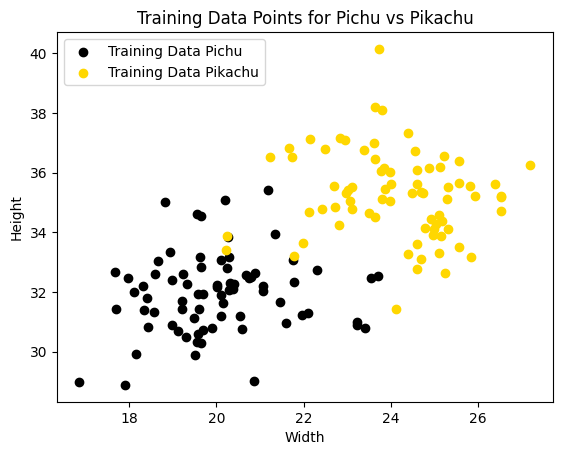

In [41]:
# Separate the data points into two lists based on their classification
pichu_data = [point for point in training_data if point["label"] == "0"]
pikachu_data = [point for point in training_data if point["label"] == "1"]

# Extract widths and heights for plotting
pichu_widths, pichu_heights = zip(*[(point["width"], point["height"]) for point in pichu_data])
pikachu_widths, pikachu_heights = zip(*[(point["width"], point["height"]) for point in pikachu_data])

# Plot the training data points with different colors for each class
plt.scatter(pichu_widths, pichu_heights, c='black', label='Training Data Pichu')
plt.scatter(pikachu_widths, pikachu_heights, c='gold', label='Training Data Pikachu')

# Set labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Training Data Points for Pichu vs Pikachu')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# BONUS (not done)

In [42]:
import random
#Shuffle import

def split_data(training_data):
    random.shuffle(training_data)
    train_data= training_data[:100]
    test_data = training_data[100:150]
    return train_data, test_data

# INSIGHT

This lab was not an easy task. It was really challenging to overcome obstacles in my path, I encountered challenges that led me through several iterations and improvements of the code. 

Although this process was demanding, it enhanced my understanding of the problem and the tools I used. 
By continuously reflecting upon and revising my code, I was able to optimize its structure and functionality. 